# Read data

In [1]:
import pandas as pd
import numpy as np

dataset_B_with_alignment = pd.read_csv('data/domains_with_political_alignment.csv')

In [2]:
dataset_B_with_alignment['dataset'].value_counts()

Non Google\nassociated       62893
Google\nassociated           13018
Google Search\nassociated     1683
Name: dataset, dtype: int64

# Calculate the political leaning variances

## At a participant level

In [3]:
# calculate the political alignment by participant
var_participant_level = dataset_B_with_alignment.drop_duplicates().groupby(['coredomain', 'dataset'])[
    'political_alignment'].var().rename('var').reset_index()


## At a visits level

In [4]:
# calculate the political alignment by participant
var_visits_level = dataset_B_with_alignment.groupby(['coredomain', 'dataset'])[
    'political_alignment'].var().rename('var').reset_index()

# Plot of variances

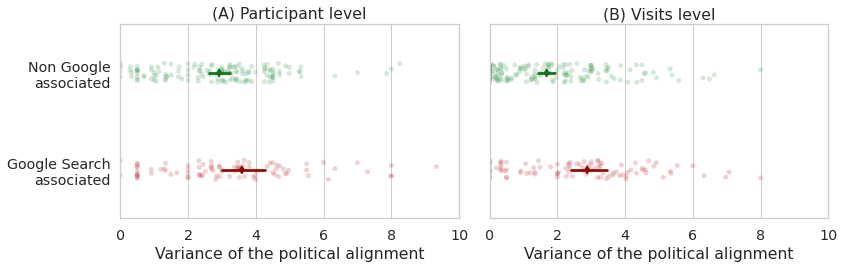

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid', font_scale=1.3)
fig, ax = plt.subplots(1,2, figsize=(12,4))

y_order = ['Non Google\nassociated', 'Google Search\nassociated'] #, 'Google\nassociated']

###########################################
# Plot A: std at a participant level #
###########################################

# Show each observation with a scatterplot
sp = sns.stripplot(y='dataset', 
                   x='var', 
                   order = y_order,
                   data=var_participant_level,
                   dodge=True,
                   alpha=.25,
                   palette = [sns.color_palette()[2], sns.color_palette()[3], sns.color_palette()[4]],
                   zorder=1,
                   ax = ax[0]
                  )


bp = sns.pointplot(y='dataset', 
                   x='var',
                   data=var_participant_level,
                   order = y_order,
                   join=False,
                   palette = [sns.color_palette('dark')[2], sns.color_palette('dark')[3], sns.color_palette('dark')[4]],
                   markers='d', 
                   scale=.75,
                   
                   ci=95,
                   ax = sp
                  )

# include the right scale
bp.set(xlim=(0,10))


# add titles and labels
bp.set_xlabel('Variance of the political alignment')
bp.set_ylabel('')
bp.set_title('(A) Participant level')


###########################################
# Plot A: std at a participant level #
###########################################

# Show each observation with a scatterplot
sp = sns.stripplot(y='dataset', 
                   x='var', 
                   order = y_order,
                   data=var_visits_level,
                   dodge=True,
                   alpha=.25,
                   palette = [sns.color_palette()[2], sns.color_palette()[3], sns.color_palette()[4]],
                   zorder=1,
                   ax = ax[1]
                  )


bp = sns.pointplot(y='dataset', 
                   x='var',
                   data=var_visits_level,
                   order = y_order,
                   join=False,
                   palette = [sns.color_palette('dark')[2], sns.color_palette('dark')[3], sns.color_palette('dark')[4]],
                   markers='d', 
                   scale=.75,
                   
                   ci=95,
                   ax = sp
                  )

# include the right scale
bp.set(xlim=(0,10))

# add titles and labels
bp.set(yticklabels=[])
bp.set_xlabel('Variance of the political alignment')
bp.set_ylabel('')
bp.set_title('(B) Visits level')

plt.tight_layout()

# Descriptives and two sample t-tests

## Participant level

In [6]:
from scipy.stats import ttest_ind
from IPython.display import display


# series for the participant level
nga_participant_level = var_participant_level[var_participant_level['dataset'] == 'Non Google\nassociated']['var']
gsa_participant_level = var_participant_level[var_participant_level['dataset'] == 'Google Search\nassociated']['var']
ga_participant_level = var_participant_level[var_participant_level['dataset'] == 'Google\nassociated']['var']

display(pd.concat([
    nga_participant_level.describe().rename('Non Google\nassociated'),
    gsa_participant_level.describe().rename('Google Search\nassociated'),
    ga_participant_level.describe().rename('Google\nassociated'),
], axis=1))

print('t-test (Google Search associated vs non Google associated)  ( df =',
      gsa_participant_level.dropna().count() + 
      nga_participant_level.dropna().count() - 2,
      '):\n',
      ttest_ind(
          gsa_participant_level.dropna(),
          nga_participant_level.dropna()
          
      ))

# print('t-test (Google associated vs non Google associated) ( df =',
#       ga_participant_level.dropna().count() +
#       nga_participant_level.dropna().count() - 2,
#       '):\n',
#       ttest_ind(
#           ga_participant_level.dropna(),
#           nga_participant_level.dropna()
#       ))


,Non Google\nassociated,Google Search\nassociated,Google\nassociated
count,146.000000,92.000000,147.000000
mean,2.917112,3.586870,3.713617
std,1.810992,2.838305,3.154813
min,0.000000,0.000000,0.000000
25%,1.500000,2.000000,2.333333
50%,3.000000,3.112648,3.275134
75%,3.852096,4.567022,4.300000
max,11.333333,18.000000,24.500000


t-test (Google Search associated vs non Google associated)  ( df = 236 ):
 Ttest_indResult(statistic=2.2233377263406693, pvalue=0.027140730070316192)


## Visits level

In [9]:

# series for the visits level
nga_visits_level = var_visits_level[var_visits_level['dataset'] == 'Non Google\nassociated']['var']
gsa_visits_level = var_visits_level[var_visits_level['dataset'] == 'Google Search\nassociated']['var']
ga_visits_level = var_visits_level[var_visits_level['dataset'] == 'Google\nassociated']['var']

display(pd.concat([
    nga_visits_level.describe().rename('Non Google\nassociated'),
    gsa_visits_level.describe().rename('Google Search\nassociated'),
    ga_visits_level.describe().rename('Google\nassociated'),
], axis=1))

print('t-test (Google Search associated vs non Google associated)  ( df =',
      gsa_visits_level.dropna().count() + 
      nga_visits_level.dropna().count() - 2,
      '):\n',
      ttest_ind(
          gsa_visits_level.dropna(),
          nga_visits_level.dropna()
          
      ))

# print('t-test (Google associated vs non Google associated) ( df =',
#       ga_visits_level.dropna().count() +
#       nga_visits_level.dropna().count() - 2,
#       '):\n',
#       ttest_ind(
#           ga_visits_level.dropna(),
#           nga_visits_level.dropna()
#       ))

,Non Google\nassociated,Google Search\nassociated,Google\nassociated
count,170.000000,103.000000,161.000000
mean,1.681309,2.879852,2.740602
std,1.660446,2.755883,2.180395
min,0.000000,0.000000,0.000000
25%,0.229290,0.916667,1.132252
50%,1.333013,2.744709,2.494071
75%,2.762192,3.904319,3.696429
max,8.000000,18.000000,12.000000


t-test (Google Search associated vs non Google associated)  ( df = 271 ):
 Ttest_indResult(statistic=4.486212097772011, pvalue=1.0722184312335935e-05)
